# How well do jobs and skills pay data scientists?

Methodology
1. Evaluate median salary for the top six data roles
2. Find median salary per skill for data scientists
3. Visualize for highest paying skills and most demanded skills

In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# filter to US jobs and drop rows with no salary info
df_US = df[(df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg'])

In [3]:
# find the top six job titles
job_titles = df_US['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
# filter the df_US dataframe for only these job titles
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [10]:
# use .groupby() method to find median job title salaries
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

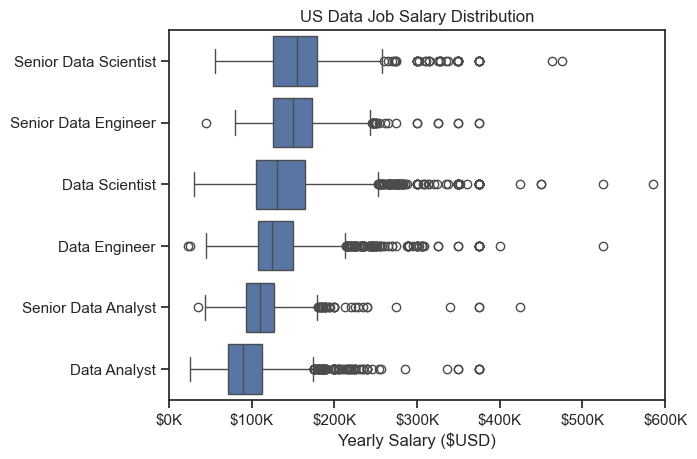

In [11]:
# plot using a Seaborn box plot
sns.boxplot(data = df_US_top6, x = 'salary_year_avg', y = 'job_title_short', order = job_order)
sns.set_theme(style = 'ticks')

plt.title('US Data Job Salary Distribution')
plt.ylabel('')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

# Investigate median salary vs skill for data scientists

In [13]:
# filter to only US data scientist roles and drop rows with no salary data
df_ds_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

df_ds_US = df_ds_US.dropna(subset = ['salary_year_avg'])

In [26]:
# explode out job skills
df_ds_US = df_ds_US.explode('job_skills')

df_ds_US[['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
116,114000.0,r
116,114000.0,python
116,114000.0,sql
116,114000.0,t-sql
116,114000.0,hadoop
116,114000.0,spark


In [23]:
# find top paying skills
df_ds_US_top_pay = df_ds_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)

df_ds_US_top_pay = df_ds_US_top_pay.head(10)

In [24]:
# now find the most popular skills
df_ds_US_skills = df_ds_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_ds_US_skills = df_ds_US_skills.head(10)

In [27]:
df_ds_US_skills.sort_values(by = 'median', ascending = False)

,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
hadoop,468,125000.0
tableau,989,125000.0
excel,490,124290.0


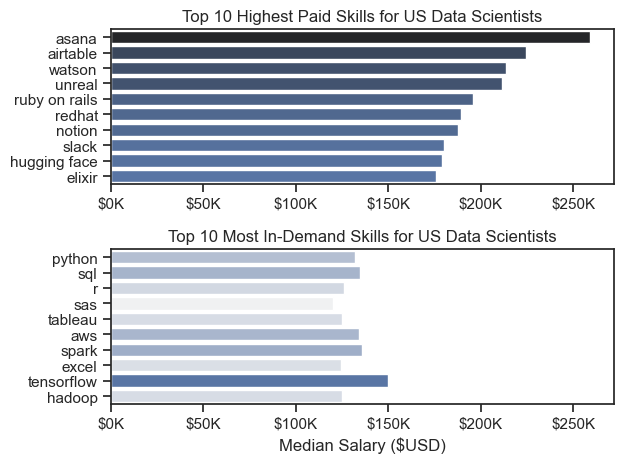

In [ ]:
# plot both dataframes using Seaborn horizontal bar charts 
fig, ax = plt.subplots(2, 1)


sns.set_theme(style = "ticks")

sns.barplot(data = df_ds_US_top_pay, x = 'median', y = df_ds_US_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')

ax[0].set_title('Top 10 Highest Paid Skills for US Data Scientists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


sns.barplot(data = df_ds_US_skills, x = 'median', y = df_ds_US_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for US Data Scientists')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()